# imports

In [595]:
import sys
sys.path.insert(0, '../')

In [1494]:
from utils.ObjectUtil import ObjectUtil
from utils.RegistrationUtils import RegistrationUtils
from sketch_object import UnlabeledObject, Stroke, Point
import matplotlib.pyplot as plt
plt.ion()
import numpy as np

In [1495]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1496]:
%autoreload 2
%matplotlib notebook

In [1497]:
# obj1_path = '/Users/moayedhajiali/Desktop/Projects/Sketch-Morphing/src/input_directory/prototypes/p5.xml'
sketch_path = '/Users/moayedhajiali/Desktop/Projects/Sketch-Morphing/ASIST_Dataset/Data/Data_A/MoneyQuestion/1_0c30a17e-24ec-442d-8438-f40eaa4e8a4f.xml'

In [1499]:
sketch1, labels1 = ObjectUtil.xml_to_UnlabeledObjects(sketch_path, re_sampling=120, rdp=False)

121
120
120
120
120
120
120
120
127
120
120
127
121
120
120
120


In [1500]:
labels1

['Triangle',
 'Triangle',
 'Circle',
 'Circle',
 'Circle',
 'Circle',
 'Circle',
 'Circle',
 'Star',
 'Circle',
 'Triangle',
 'Star',
 'Triangle',
 'Triangle',
 'Triangle',
 'Circle']

In [1478]:
c = 8
obj1, obj2 = sketch1[c].get_copy(), sketch1[c].get_copy()

In [1479]:
len(obj1), len(obj2)

(127, 127)

<IPython.core.display.Javascript object>


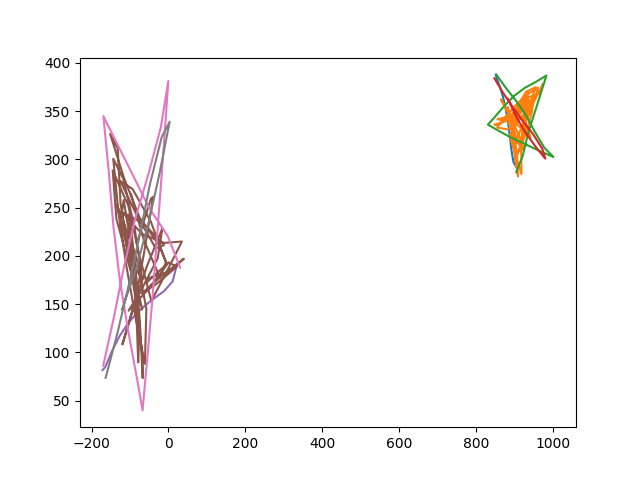

In [1480]:
fig, ax = plt.subplots()
obj2.visualize(show=False, ax=ax)

In [1481]:
p = [2, 2, np.pi/2, 0, 0.0, 40, 40]

In [1482]:
RegistrationUtils.obtain_transformation_matrix(p)

array([ 1.2246468e-16, -2.0000000e+00,  4.0000000e+01,  2.0000000e+00,
        1.2246468e-16,  4.0000000e+01])

In [1483]:
obj1_transformed = obj1.get_copy()
obj1_transformed.transform(RegistrationUtils.obtain_transformation_matrix(p), object_min_origin=True)
obj1_transformed.visualize(show=False, ax=ax)
fig.show()

In [1484]:
obj1_transformed.origin_min_x, obj1_transformed.origin_min_y

(831.097759669055, 282.2769501475559)

In [1485]:
# p2 = [1/2, 1/2, -np.pi/2, 0, 0, -40, -40]

In [1486]:
# RegistrationUtils.obtain_transformation_matrix(p2)

In [1487]:
# obj1_transformed.transform(RegistrationUtils.obtain_transformation_matrix(p2), object_min_origin=True)
# obj1_transformed.visualize(show=False, ax=ax)
# fig.show()

# test normalization 
- normalize both objects, and apply transformation on the obj1_2

In [1488]:
# scale obj1 
tmp = ObjectUtil.poly_to_accumulative_stroke3([obj1_transformed], red_rdp=False)
tmp = RegistrationUtils.pad_sketches(tmp, maxlen=128)
tmp = np.expand_dims(tmp, axis=-1)
obj1_2 = ObjectUtil.accumalitive_stroke3_to_poly(tmp)[0]

In [1489]:
# scale obj2
tmp = ObjectUtil.poly_to_accumulative_stroke3([obj2], red_rdp=False)
tmp = RegistrationUtils.pad_sketches(tmp, maxlen=128)
tmp = np.expand_dims(tmp, axis=-1)
obj2_2 = ObjectUtil.accumalitive_stroke3_to_poly(tmp)[0]

<IPython.core.display.Javascript object>


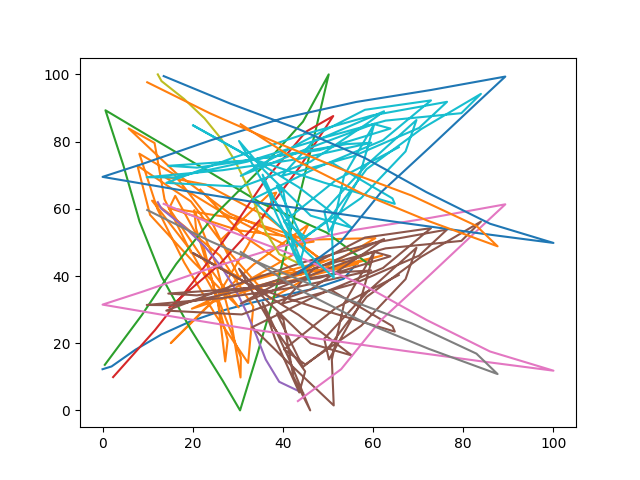

In [1490]:
fig2, ax2 = plt.subplots()
obj1_2.visualize(show=False, ax=ax2)
obj2_2.visualize(show=False, ax=ax2)

In [1491]:
p = [1, 1, -np.pi/2, 0, 0, 0, 100]
t = RegistrationUtils.obtain_transformation_matrix(p)
obj1_2.transform(RegistrationUtils.obtain_transformation_matrix(p), object_min_origin=False)
obj1_2.visualize(show=False, ax=ax2)

In [1492]:
t

array([ 6.123234e-17,  1.000000e+00,  0.000000e+00, -1.000000e+00,
        6.123234e-17,  1.000000e+02])

In [1493]:
p, RegistrationUtils.decompose_tranformation_matrix(t) # should equal p

([1, 1, -1.5707963267948966, 0, 0, 0, 100],
 array([  1.        ,   1.        ,  -1.57079633,   0.        ,
          0.        ,   0.        , 100.        ]))

# Testing denormalizing transformation
- denormnalize transformation matrix and transform

In [1503]:
t_denormalized = ObjectUtil.denormalized_transformation(obj1_transformed, obj2, t)

0.5


In [1504]:
t_denormalized

array([ 3.0616170e-17,  5.0000000e-01,  8.3109776e+02, -5.0000000e-01,
        3.0616170e-17,  4.5285231e+02])

<IPython.core.display.Javascript object>


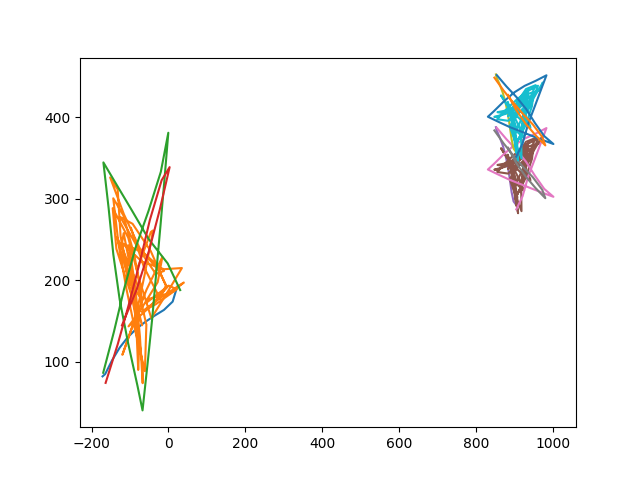

In [1505]:
fig2, ax2 = plt.subplots()
obj1_transformed.visualize(show=False, ax=ax2)
obj2.visualize(show=False, ax=ax2)
# obj2.transform(t_denormalized)
# obj2.visualize(show=False, ax=ax2)

In [1506]:
tmp_obj = obj1_transformed.get_copy()
tmp_obj.transform(t_denormalized, object_min_origin=True)
tmp_obj.visualize(show=False, ax=ax2)

# test decomposing transformation matrix

In [1402]:
# test sequential alone
p = [3.4, 3.2, 0.4, 0, 0.4, 0, 0]
pre_t = RegistrationUtils.obtain_transformation_matrix(p)
seq_params = RegistrationUtils.get_seq_translation_matrices(p)

In [1403]:
tp = np.zeros(6)
t1 = [1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
for t in seq_params:
    tp = np.zeros(6)
    tp[0] = t[0] * t1[0] + t[1] * t1[3]
    tp[1] = t[0] * t1[1] + t[1] * t1[4]
    tp[2] = t[2] + t1[2]
    tp[3] = t[3] * t1[0] + t[4] * t1[3]
    tp[4] = t[3] * t1[1] + t[4] * t1[4]
    tp[5] = t[5] + t1[5]
    t1 = tp

In [1404]:
pre_t, t1 # should equal to each others

(array([ 2.60199843, -1.2461387 ,  0.        ,  2.57666532,  2.94739518,
         0.        ]),
 array([ 2.60199843, -1.2461387 ,  0.        ,  2.57666532,  2.94739518,
         0.        ]))

In [1405]:
p_decomposed = RegistrationUtils.decompose_tranformation_matrix(t1)
print(p_decomposed == p)
p_decomposed, p # should equal to each others


[ True False  True  True False  True  True]


(array([3.4, 3.2, 0.4, 0. , 0.4, 0. , 0. ]), [3.4, 3.2, 0.4, 0, 0.4, 0, 0])

In [1406]:
obj1_seq = obj1_transformed.get_copy()

In [1407]:
p_denormalized = RegistrationUtils.decompose_tranformation_matrix(t_denormalized)
p_denormalized

array([ 5.00000000e-01,  5.00000000e-01, -1.57079633e+00,  0.00000000e+00,
        0.00000000e+00,  1.48711218e+03,  4.89726558e+02])

In [1408]:
RegistrationUtils.obtain_transformation_matrix(p_denormalized), t_denormalized

(array([ 3.06161700e-17,  5.00000000e-01,  1.48711218e+03, -5.00000000e-01,
         3.06161700e-17,  4.89726558e+02]),
 array([ 3.06161700e-17,  5.00000000e-01,  1.48711218e+03, -5.00000000e-01,
         3.06161700e-17,  4.89726558e+02]))

In [1409]:
seq_params = RegistrationUtils.get_seq_translation_matrices(p_denormalized)

In [1410]:
seq_params

[[0.5, 0.0, 0.0, 0.0, 0.5, 0.0],
 [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [6.123233995736766e-17, 1.0, 0.0, -1.0, 6.123233995736766e-17, 0.0],
 [1.0, 0.0, 1487.1121764171933, 0.0, 1.0, 489.72655832853707]]

<IPython.core.display.Javascript object>


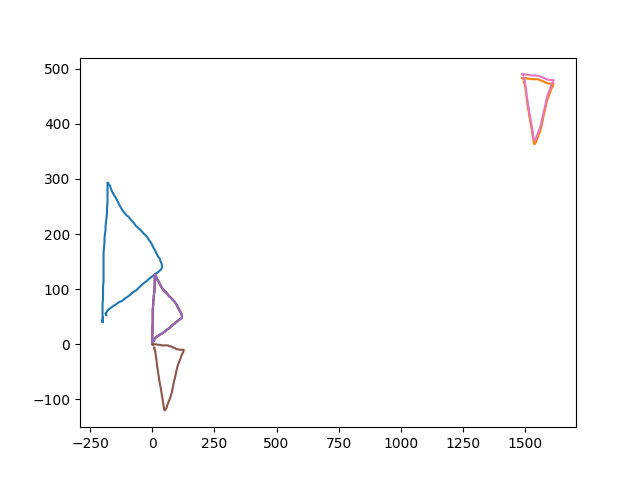

In [1411]:
fig2, ax2 = plt.subplots()
obj1_transformed.visualize(show=False, ax=ax2)
obj2.visualize(show=False, ax=ax2)
# obj2.transform(t_denormalized)
# obj2.visualize(show=False, ax=ax2)

In [1412]:
tp = np.zeros(6)
t1 = [1.0, 0.0, 0.0, 0.0, 1.0, 0.0]
for i, t in enumerate(seq_params):
    tp = np.zeros(6)
    tp[0] = t[0] * t1[0] + t[1] * t1[3]
    tp[1] = t[0] * t1[1] + t[1] * t1[4]
    tp[2] = t[2] + t1[2]
    tp[3] = t[3] * t1[0] + t[4] * t1[3]
    tp[4] = t[3] * t1[1] + t[4] * t1[4]
    tp[5] = t[5] + t1[5]
    t1 = tp
    if i == 0:
        obj1_seq.transform(t, object_min_origin=True)
    else:
        obj1_seq.transform(t, object_min_origin=False)
    obj1_seq.visualize(show=False, ax=ax2)


In [1413]:
t1, RegistrationUtils.obtain_transformation_matrix(p_denormalized), t_denormalized

(array([ 3.06161700e-17,  5.00000000e-01,  1.48711218e+03, -5.00000000e-01,
         3.06161700e-17,  4.89726558e+02]),
 array([ 3.06161700e-17,  5.00000000e-01,  1.48711218e+03, -5.00000000e-01,
         3.06161700e-17,  4.89726558e+02]),
 array([ 3.06161700e-17,  5.00000000e-01,  1.48711218e+03, -5.00000000e-01,
         3.06161700e-17,  4.89726558e+02]))